In [7]:
import re
import string
import numpy as np
import nltk
import pandas as pd
import spacy
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import requests

# Function to fetch all pages of data
def fetch_all_pages(url, params, headers):
    all_data = []
    while url:
        response = requests.get(url,params=params, headers=headers)
        if response.status_code == 200:
            data = response.json()
            all_data.extend(data)
            url = response.links.get('next', {}).get('url')  # Get URL for next page if available
        else:
            print(f"Error code {response.status_code}: Failed to fetch data from {url}")
            break
    return all_data

def fetch_GitHub_issues_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    issues_url = f"{base_url}/issues?per_page={per_page}"

    # Define the params and headers just care closed issues
    params = {
        "state": "closed"
    }
    headers = {'User-Agent': 'request'}
    return fetch_all_pages(issues_url, params, headers)

In [9]:
# Define your GitHub owner and repository details
owner = "stanfordnlp"
repo = "dspy"

In [ ]:
issues_data = fetch_GitHub_issues_data(owner, repo)

In [ ]:


# Use dataframe to store relevant data
issues_df = pd.DataFrame.from_records(issues_data)
issues_df.head()

In [ ]:
issues_df.columns

In [ ]:
issues_df.to_csv(f"{owner}_{repo}_issues_data_raw.csv")

In [ ]:
def fetch_GitHub_milestones_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    milestones_url = f"{base_url}/milestones?per_page={per_page}"

    # Define the params and headers just care closed issues
    params = {
        "state": "closed"
    }
    headers = {'User-Agent': 'request'}
    return fetch_all_pages(milestones_url, params, headers)

In [ ]:
milestones_data = fetch_GitHub_milestones_data(owner, repo)
milestones_df = pd.DataFrame.from_records(milestones_data)
milestones_df.to_csv(f"{owner}_{repo}_milestones_data_raw.csv")
milestones_df.columns

In [ ]:
def fetch_GitHub_pulls_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    pulls_url = f"{base_url}/pulls?per_page={per_page}"

    # Define the params and headers just care closed issues
    params = {
        "state": "closed"
    }
    headers = {'User-Agent': 'request'}
    return fetch_all_pages(pulls_url, params, headers)

In [ ]:
pulls_data = fetch_GitHub_pulls_data(owner, repo)

In [ ]:
pulls_df = pd.DataFrame.from_records(pulls_data)
pulls_df.to_csv(f"{owner}_{repo}_pulls_data_raw.csv")
pulls_df.columns

In [ ]:
def fetch_GitHub_commits_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    pulls_url = f"{base_url}/commits?per_page={per_page}"

    params = {}

    headers = {'User-Agent': 'request'}
    return fetch_all_pages(pulls_url, params, headers)

In [ ]:
commits_data = fetch_GitHub_commits_data(owner, repo)

In [ ]:
commits_df = pd.DataFrame.from_records(commits_data)
commits_df.to_csv(f"{owner}_{repo}_commits_data_raw.csv")
commits_df.columns

In [ ]:
def fetch_GitHub_releases_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    pulls_url = f"{base_url}/releases?per_page={per_page}"

    params = {}

    headers = {'User-Agent': 'request'}
    return fetch_all_pages(pulls_url, params, headers)

In [ ]:
releases_data = fetch_GitHub_releases_data(owner, repo)

In [ ]:
releases_df = pd.DataFrame.from_records(releases_data)
releases_df.to_csv(f"{owner}_{repo}_releases_data_raw.csv")
releases_df.columns

In [ ]:
def fetch_GitHub_branches_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    branch_url = f"{base_url}/branches?per_page={per_page}"

    params = {}

    headers = {'User-Agent': 'request'}
    return fetch_all_pages(branch_url, params, headers)

In [ ]:
branches = fetch_GitHub_branches_data(owner, repo)

In [ ]:
branches_df = pd.DataFrame.from_records(branches)
branches_df.to_csv(f"{owner}_{repo}_branches_data_raw.csv")
branches_df.columns

In [ ]:
def fetch_GitHub_events_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    event_url = f"{base_url}/events?per_page={per_page}"

    params = {}

    headers = {'User-Agent': 'request'}
    return fetch_all_pages(event_url, params, headers)

In [ ]:
events_data = fetch_GitHub_events_data(owner, repo)

In [ ]:
import pandas as pd

events_df = pd.DataFrame.from_records(events_data)
events_df.to_csv(f"{owner}_{repo}_events_data_raw.csv")
events_df.columns

In [ ]:
def fetch_GitHub_issues_events_data(owner, repo):
    per_page = 100
    # GitHub API endpoints
    base_url = f"https://api.github.com/repos/{owner}/{repo}"
    issues_url = f"{base_url}/issues/events?per_page={per_page}"

    # Define the params and headers just care closed issues
    params = {
        "state": "closed"
    }
    headers = {'User-Agent': 'request'}
    return fetch_all_pages(issues_url, params, headers)

In [ ]:
issues_events_data = fetch_GitHub_issues_events_data(owner, repo)

In [ ]:
import pandas as pd

issues_events_data = pd.DataFrame.from_records(issues_events_data)
issues_events_data.to_csv(f"{owner}_{repo}_issues_events_data_raw.csv")
issues_events_data.columns

In [ ]:
issues_events_data[issues_events_data.review_requester.notna()]

In [ ]:
events_df[events_df.type == "PullRequestReviewEvent"].head()

In [ ]:
pull_request_review_events = events_df[events_df.type == "PullRequestReviewEvent"]
pull_request_review_events_payload = pull_request_review_events["payload"]
pr_review_payload_df = pd.DataFrame(list(pull_request_review_events_payload))
pr_review_payload_df["pull_request"]
pr_review_number_list = []
for index, pr in pr_review_payload_df.iterrows():
    pr_review_number_list.append(pr["pull_request"]["number"])
pr_review_number_list

In [ ]:
iterations_df = pd.DataFrame(columns=["Type", "Related url","planned/unplanned", "Cause", "Body", "Start Time", "End Time", "Duration"])

### Issue columns
Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'draft', 'pull_request', 'body', 'reactions',
       'timeline_url', 'performed_via_github_app', 'state_reason'],
      dtype='object')
### Pull request columns
Index(['url', 'id', 'node_id', 'html_url', 'diff_url', 'patch_url',
       'issue_url', 'number', 'state', 'locked', 'title', 'user', 'body',
       'created_at', 'updated_at', 'closed_at', 'merged_at',
       'merge_commit_sha', 'assignee', 'assignees', 'requested_reviewers',
       'requested_teams', 'labels', 'milestone', 'draft', 'commits_url',
       'review_comments_url', 'review_comment_url', 'comments_url',
       'statuses_url', 'head', 'base', '_links', 'author_association',
       'auto_merge', 'active_lock_reason'],
      dtype='object')


In [ ]:
for index,release in releases_df.iterrows():
    type = "Release"
    related_url = release.html_url
    body = "version: " + str(release.name) + ",\n Body:\n " +  str(release.body)
    isplanned = "planned"
    start_at = release.created_at
    end_at = release.published_at
    duration = pd.Timestamp(end_at) - pd.Timestamp(start_at)
    iterations_df.loc[len(iterations_df.index)] = [type, related_url, isplanned, "New Version publication", body, start_at, end_at, duration]

for index,milestone in milestones_df.iterrows():
    type = "Milestone"
    milestone_url = milestone.html_url
    body = "Title: " + str(milestone.title) + ",\n Description:\n " +  str(milestone.description) + "\n open_issues: " + str(milestone.open_issues) 
    + "\n closed_issues: " + str(milestone.closed_issues)
    isplanned = "planned"
    start_at = milestone.created_at
    end_at = milestone.closed_at
    duration = pd.Timestamp(end_at) - pd.Timestamp(start_at)
    iterations_df.loc[len(iterations_df.index)] = [type, related_url, isplanned, "New Version publication", body, start_at, end_at, duration]

for index, issue in issues_df.iterrows():
    related_url = issue.html_url
    body = str(issue.title)+ " " + str(issue.body)
    isplanned = "unplanned"
    start_at = issue.created_at  
    end_at = issue.closed_at
    duration = pd.Timestamp(end_at) - pd.Timestamp(start_at)
    if pd.isna(issue.pull_request):
        type = "Bug Fixing Process"
    else:
        if pd.notna(issue.milestone) or pd.notna(issue.assignee):
            isplanned = "planned"
        number = issue.number
        if number in pr_review_number_list:
            type = "Knowledge Integration"
        else:
            type = "Direct Implementation"
    iterations_df.loc[len(iterations_df.index)] = [type, related_url, isplanned, "Unknown", body, start_at, end_at, duration]        
        

In [ ]:
iterations_df.head()

In [ ]:
iterations_df.shape

In [ ]:
iterations_for_ML_model = iterations_df[iterations_df.Cause == "Unknown"][iterations_df["Type"]!="Bug Fixing Process"]
iterations_for_ML_model

# Data preprocessing

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
STOPWORDS = set(stopwords.words("english"))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r"", string)

In [ ]:
def preprocess_data(text):
    text = clean_text(text)
    text = remove_emoji(text)
    text = remove_stopwords(text)
    text = lemmatize_words(text)
    return text

In [ ]:
iterations_for_ML_model["Context"] = iterations_for_ML_model["Body"].astype(str).apply(preprocess_data)
iterations_for_ML_model.head()

In [85]:
iterations_for_ML_model.to_csv(f"{owner}_{repo}_iterations_data_raw.csv")

In [10]:
iterations_labeled_df = pd.read_csv(f"{owner}_{repo}_iterations_labeled_data.csv")

In [19]:
iterations_labeled_df['Context'] = iterations_labeled_df['Context'].str.rstrip(' None')

In [28]:
iterations_labeled_df[iterations_labeled_df["Cause"]=="Rework"]

,ID,Type,Related url,planned/unplanned,Cause,Body,Start Time,End Time,Duration,Context
3,5,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/743,unplanned,Rework,Fixed missing copy in TypedPredictor None,2024-03-30T20:58:22Z,2024-03-30T20:58:29Z,0 days 00:00:07,fix miss copy typedpredictor
6,9,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/731,unplanned,Rework,Fix OpenAIVectorizer Fixes #728 \r\n\r\n-[ ] S...,2024-03-28T18:24:16Z,2024-03-28T18:34:24Z,0 days 00:10:08,fix openaivectorizer fix squash commits obey c...
8,11,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/725,unplanned,Rework,docs: fix cheatsheet no RM loaded error in ReA...,2024-03-27T18:52:35Z,2024-03-30T06:15:31Z,2 days 11:22:56,docs fix cheatsheet rm load error react
10,13,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/719,unplanned,Rework,"fix(dsp): in `HFClientVLLM`, actually use `kwa...",2024-03-25T23:28:16Z,2024-04-01T21:57:25Z,6 days 22:29:09,fixdsp hfclientvllm actually use kwargs payloa...
11,15,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/716,unplanned,Rework,Update Cohere LM to use the `/chat` API and a...,2024-03-25T21:48:34Z,2024-03-27T14:23:18Z,1 days 16:34:44,update cohere lm use chat api add support comm...
...,...,...,...,...,...,...,...,...,...,...
318,518,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/48,unplanned,Rework,Fix bug in majority_vote_ Fix issue raised in ...,2023-04-24T17:15:07Z,2023-04-24T17:16:58Z,0 days 00:01:51,fix bug majorityvote fix issue rais
320,521,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/45,unplanned,Rework,bug(cohere-lm): retry only for rate-limit erro...,2023-04-24T12:14:00Z,2023-04-24T12:14:27Z,0 days 00:00:27,bugcoherelm retry ratelimit error
321,522,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/44,planned,Rework,bug(faiss): mismatch in types & args instead o...,2023-04-23T21:28:20Z,2023-04-23T21:49:23Z,0 days 00:21:03,bugfaiss mismatch type args instead kwargs add...
337,550,Direct Implementation,https://github.com/stanfordnlp/dspy/pull/16,unplanned,Rework,Resolve import issues for FAISS @okhat resolve...,2023-02-19T16:24:08Z,2023-02-19T16:39:49Z,0 days 00:15:41,resolve import issue faiss okhat resolve last ...


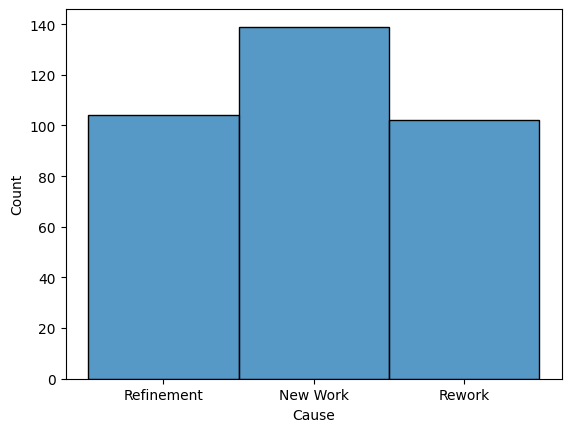

In [21]:
histplot = sns.histplot(iterations_labeled_df["Cause"])

In [22]:
fig = histplot.get_figure()
fig.savefig("histplot.pdf") 

In [23]:
# Split the data into training and test sets
X = iterations_labeled_df["Context"]  # Features
y = iterations_labeled_df["Cause"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name} using TF-IDF...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    joblib.dump(model, f"trained_{name}_model.pkl")
    print(f"Evaluating {name} using TF-IDF:")
    print(classification_report(y_test, y_pred))


Training Random Forest using TF-IDF...
Evaluating Random Forest using TF-IDF:
              precision    recall  f1-score   support

    New Work       0.64      0.88      0.74        26
  Refinement       0.89      0.36      0.52        22
      Rework       0.71      0.81      0.76        21

    accuracy                           0.70        69
   macro avg       0.75      0.69      0.67        69
weighted avg       0.74      0.70      0.67        69

Training Gradient Boosting using TF-IDF...
Evaluating Gradient Boosting using TF-IDF:
              precision    recall  f1-score   support

    New Work       0.70      0.73      0.72        26
  Refinement       0.80      0.55      0.65        22
      Rework       0.59      0.76      0.67        21

    accuracy                           0.68        69
   macro avg       0.70      0.68      0.68        69
weighted avg       0.70      0.68      0.68        69



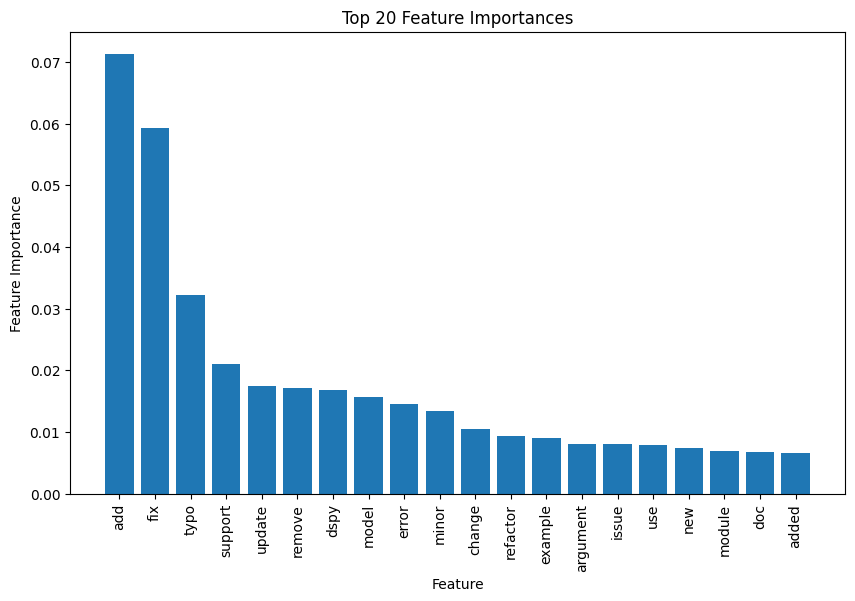

In [30]:
model = joblib.load("trained_Random Forest_model.pkl")

# Get feature importances
features = tfidf_vectorizer.get_feature_names_out()
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Number of top features to display
top_n = 20  # Adjust this value as needed

# Plot top N feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), importances[indices][:top_n], align='center')
plt.xticks(range(top_n), [features[i] for i in indices][:top_n], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importances')
# Save the plot as a PDF file
plt.savefig("feature_importances.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>